
<h2>Evaluation of Data Preprocessing Methods for Predicting Brazilian Flight Delays</h2>


<h3> Loading Libraries</h3>

<h4>Loading preprocessing functions.

Installation of R packages.</h4>



In [3]:
options(java.parameters = "-Xmx31g")


source("https://raw.githubusercontent.com/leonardosminfo/presentation/master/code/Preprocessing.R")


Loading required package: glmnet
Warning message:
"package 'glmnet' was built under R version 3.4.4"Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.4.4"Loading required package: FSelector
Warning message:
"package 'FSelector' was built under R version 3.4.4"Error: package or namespace load failed for 'FSelector':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: No CurrentVersion entry in Software/JavaSoft registry! Try re-installing Java and make sure R and Java have matching architectures.
Installing package into 'C:/Users/leonardosm/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'FSelector' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\leonardosm\AppData\Local\Temp\RtmpM3Lfw3\downloaded_packages


Loading required package: x
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'x'"Loading required package: doBy
Warning message:
"package 'doBy' was built under R version 3.4.4"Loading required package: caret
Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Loading required package: MASS
Loading required package: DMwR
Loading required package: grid
Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ROCR
Warning message:
"pack

<h4>Loading Vra Integrated Database</h4>

In [4]:

dir.create("Saves")
dir.create("Saves/NN")
dir.create("Saves/RF")

load_result <- load_vra()

Warning message in dir.create("Saves"):
"'Saves' já existe"Warning message in dir.create("Saves/NN"):
"'Saves\NN' já existe"Warning message in dir.create("Saves/RF"):
"'Saves\RF' já existe"

In [3]:
glimpse(load_result$vra_wu)

Observations: 8,683,195
Variables: 38
$ airline               <fctr> TAM, TAM, AAL, JAL, AAL, DAL, TAM, AAL, TAM,...
$ flight                <fctr> 8082, 8080, 956, 47, 950, 120, 8078, 974, 80...
$ line_type             <fctr> I, I, I, I, I, I, I, I, I, I, I, I, I, I, G,...
$ departure             <fctr> SBGR, SBGR, SAEZ, SBGR, SBGR, SBGR, SBGL, SB...
$ departure_state       <chr> "SP", "SP", NA, "SP", "SP", "SP", "RJ", "RJ",...
$ departure_expect      <dttm> 2009-01-01 08:45:00, 2009-01-01 22:30:00, 20...
$ departure_time        <dttm> 2009-01-01 08:45:00, 2009-01-01 22:30:00, 20...
$ departure_delay       <dbl> 0, 0, 0, 0, 0, 0, 46, 0, 22, 113, 40, 0, 0, 0...
$ departure_year        <dbl> 2009, 2009, 2009, 2009, 2009, 2009, 2009, 200...
$ departure_month       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour        <int> 8, 22, 22, 23, 23, 23, 23, 23, 8, 22, 23, 22,...
$ departure_day         <int> 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...
$ departure_we

In [4]:
head(load_result$vra_wu,5)

airline,flight,line_type,departure,departure_state,departure_expect,departure_time,departure_delay,departure_year,departure_month,...,arrival_humidity,arrival_pressure,arrival_visibility,arrival_events,arrival_conditions,duration_expect,duration,duration_delta,status,observation
TAM,8082,I,SBGR,SP,2009-01-01 08:45:00,2009-01-01 08:45:00,0,2009,1,...,17.2,1025.4,37,GENTLEBREEZE,NONE,600,600,0,REALIZADO,NO
TAM,8080,I,SBGR,SP,2009-01-01 22:30:00,2009-01-01 22:30:00,0,2009,1,...,8.3,1016.0,48,FRESHBREEZE,NONE,600,600,0,REALIZADO,NO
AAL,956,I,SAEZ,NA,2009-01-01 22:15:00,2009-01-01 22:15:00,0,2009,1,...,8.9,1015.1,52,MODERATEBREEZE,NONE,650,650,0,REALIZADO,NO
JAL,47,I,SBGR,SP,2009-01-01 23:55:00,2009-01-01 23:55:00,0,2009,1,...,8.9,1015.1,52,MODERATEBREEZE,NONE,575,575,0,REALIZADO,NO
AAL,950,I,SBGR,SP,2009-01-01 23:25:00,2009-01-01 23:25:00,0,2009,1,...,8.9,1015.1,52,MODERATEBREEZE,NONE,580,580,0,REALIZADO,NO


<h3>Data Cleaning</h3>

In [18]:
clean_result <- data_clean_by_domain(load_result$vra_wu)
clean_result$report


condition,qtd
canceled flights,830436
depature time occuring after arrival time,1758
depature equals arrival,15775
negative flight duration,1758
flight duration greather than one day,2349
too low or too high temperature values,0
too high dew point,0
invalid humidity range,21
invalid preasure range,139
invalid visibility range,2


In [19]:
glimpse(clean_result$vra_wu)

Observations: 7,832,743
Variables: 38
$ airline               <fctr> TAM, TAM, AAL, JAL, AAL, DAL, TAM, AAL, TAM,...
$ flight                <fctr> 8082, 8080, 956, 47, 950, 120, 8078, 974, 80...
$ line_type             <fctr> I, I, I, I, I, I, I, I, I, I, I, I, I, I, I,...
$ departure             <fctr> SBGR, SBGR, SAEZ, SBGR, SBGR, SBGR, SBGL, SB...
$ departure_state       <chr> "SP", "SP", NA, "SP", "SP", "SP", "RJ", "RJ",...
$ departure_expect      <dttm> 2009-01-01 08:45:00, 2009-01-01 22:30:00, 20...
$ departure_time        <dttm> 2009-01-01 08:45:00, 2009-01-01 22:30:00, 20...
$ departure_delay       <dbl> 0, 0, 0, 0, 0, 0, 46, 0, 22, 113, 40, 0, 0, 0...
$ departure_year        <dbl> 2009, 2009, 2009, 2009, 2009, 2009, 2009, 200...
$ departure_month       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour        <int> 8, 22, 22, 23, 23, 23, 23, 23, 8, 22, 23, 22,...
$ departure_day         <int> 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...
$ departure_we

<h3>Data Filtering</h3>

In [20]:
filtered_result <- filter_vra(clean_result$vra_wu)


2015:2017

In [21]:
glimpse(filtered_result$vra_wu)


Observations: 1,652,941
Variables: 19
$ airline               <fctr> AZU, GLO, AZU, GLO, TAM, ONE, TAM, GLO, GLO,...
$ flight                <fctr> 4100, 1934, 4101, 1350, 3664, 6222, 3893, 18...
$ departure             <fctr> SBMO, SBGL, SBKP, SBGR, SBGR, SBBR, SBRF, SB...
$ arrival               <fctr> SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SB...
$ departure_expect      <dttm> 2015-01-01 02:27:00, 2015-01-01 07:41:00, 20...
$ departure_time        <dttm> 2014-12-31 02:15:00, 2015-01-01 07:41:00, 20...
$ departure_year        <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201...
$ departure_month       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour        <int> 2, 7, 9, 10, 11, 12, 14, 15, 16, 22, 23, 22, ...
$ departure_day         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...
$ departure_weekday     <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, ...
$ departure_temperature <dbl> 24, 25, 25, 28, 29, 30, 28, 29, 35, 26, 26, 2...
$ departure_de

<h3>Data Imputation</h3>

<h4>Missing Data</h4>

Observations: 1,652,941
Variables: 19
$ airline               <fctr> AZU, GLO, AZU, GLO, TAM, ONE, TAM, GLO, GLO,...
$ flight                <fctr> 4100, 1934, 4101, 1350, 3664, 6222, 3893, 18...
$ departure             <fctr> SBMO, SBGL, SBKP, SBGR, SBGR, SBBR, SBRF, SB...
$ arrival               <fctr> SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SB...
$ departure_expect      <dttm> 2015-01-01 02:27:00, 2015-01-01 07:41:00, 20...
$ departure_time        <dttm> 2014-12-31 02:15:00, 2015-01-01 07:41:00, 20...
$ departure_year        <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201...
$ departure_month       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour        <int> 2, 7, 9, 10, 11, 12, 14, 15, 16, 22, 23, 22, ...
$ departure_day         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...
$ departure_weekday     <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, ...
$ departure_temperature <dbl> 24, 25, 25, 28, 29, 30, 28, 29, 35, 26, 26, 2...
$ departure_de

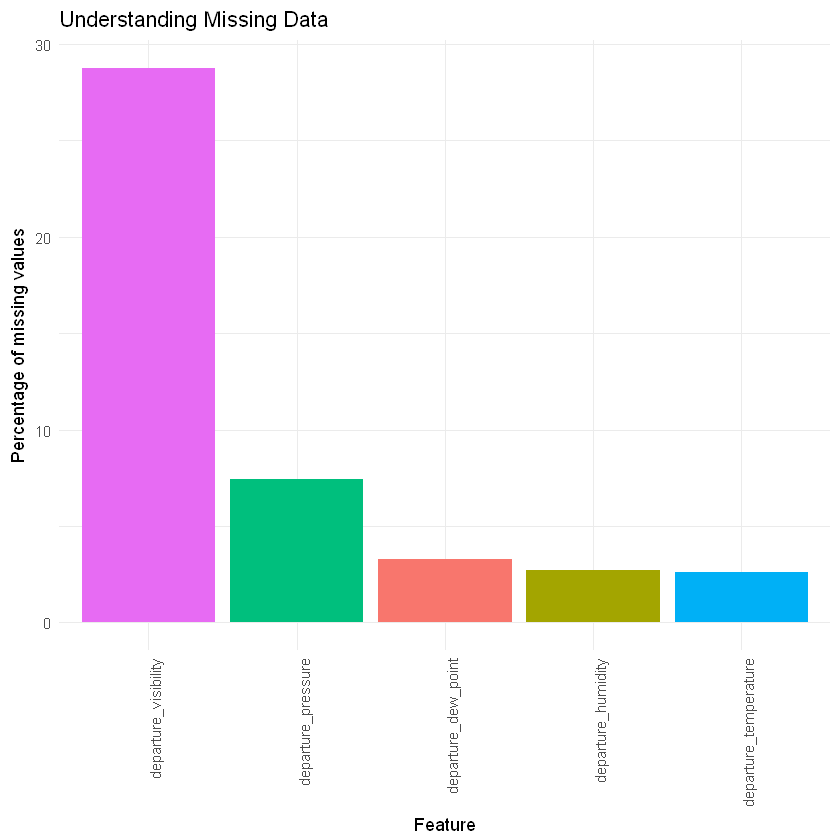

In [22]:
data_missing(filtered_result$vra_wu)

<h4>Imputation</h4>

Observations: 1,652,941
Variables: 19
$ airline               <fctr> AZU, GLO, AZU, GLO, TAM, ONE, TAM, GLO, GLO,...
$ flight                <fctr> 4100, 1934, 4101, 1350, 3664, 6222, 3893, 18...
$ departure             <fctr> SBMO, SBGL, SBKP, SBGR, SBGR, SBBR, SBRF, SB...
$ arrival               <fctr> SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SBAR, SB...
$ departure_expect      <dttm> 2015-01-01 02:27:00, 2015-01-01 07:41:00, 20...
$ departure_time        <dttm> 2014-12-31 02:15:00, 2015-01-01 07:41:00, 20...
$ departure_year        <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201...
$ departure_month       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour        <int> 2, 7, 9, 10, 11, 12, 14, 15, 16, 22, 23, 22, ...
$ departure_day         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...
$ departure_weekday     <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, ...
$ departure_temperature <dbl> 24, 25, 25, 28, 29, 30, 28, 29, 35, 26, 26, 2...
$ departure_de

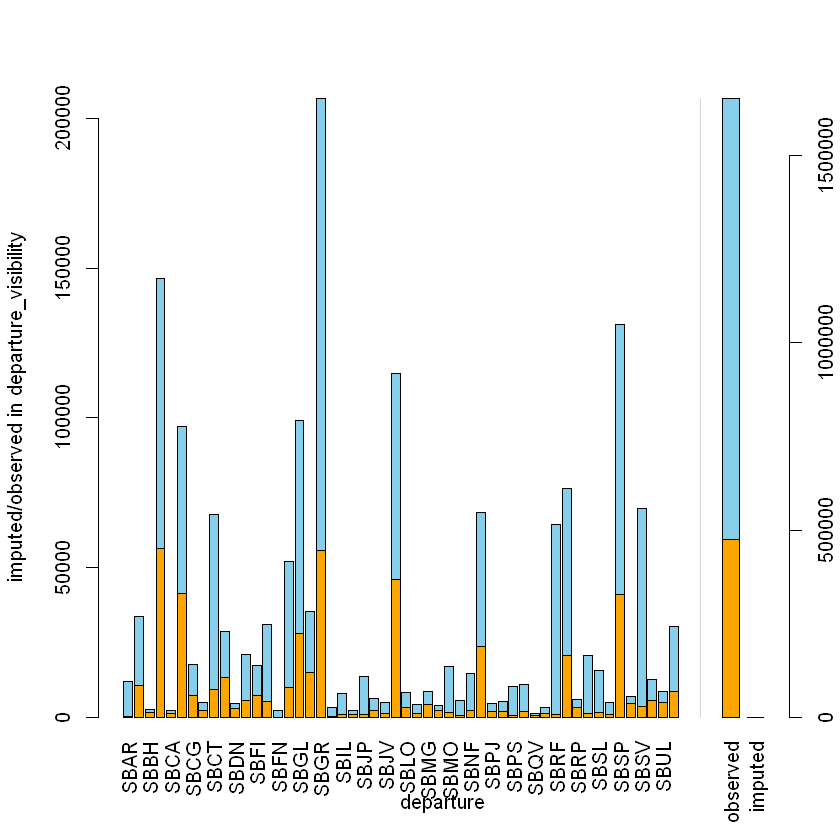

In [23]:
inputation_result <- data_inputation(filtered_result$vra_wu)

<h3>Data Transformation</h3>

In [11]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/transform_result.RData")

In [9]:
glimpse(transform_result$vra_wu)

Observations: 1,652,941
Variables: 182
$ airline                                       <fctr> AZU, GLO, AZU, GLO, ...
$ flight                                        <fctr> 4100, 1934, 4101, 13...
$ departure                                     <fctr> SBMO, SBGL, SBKP, SB...
$ arrival                                       <fctr> SBAR, SBAR, SBAR, SB...
$ departure_expect                              <dttm> 2015-01-01 02:27:00,...
$ departure_time                                <dttm> 2014-12-31 02:15:00,...
$ departure_year                                <dbl> 2015, 2015, 2015, 201...
$ departure_month                               <dbl> 1, 1, 1, 1, 1, 1, 1, ...
$ departure_hour                                <int> 2, 7, 9, 10, 11, 12, ...
$ departure_day                                 <int> 1, 1, 1, 1, 1, 1, 1, ...
$ departure_weekday                             <dbl> 5, 5, 5, 5, 5, 5, 5, ...
$ departure_temperature                         <dbl> 24, 25, 25, 28, 29, 3...
$ departure_d

<h4>Transformed Data Dictionary</h4>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-c3ow">ID</th>
    <th class="tg-c3ow">Description</th>
    <th class="tg-c3ow">Attributes</th>
    <th class="tg-c3ow">Type</th>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">remove</td>
    <td class="tg-0pky">flight;departure_expect;arrival_expect</td>
    <td class="tg-0pky">Factor;<br>Datetime (POSIXct);<br>Datetime (POSIXct)</td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">basic</td>
    <td class="tg-0pky">airline;departure;arrival;</td>
    <td class="tg-0pky">Factor</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">CH</td>
    <td class="tg-0pky">departure_year;departure_month;<br> departure_day;departure_hour</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">bin</td>
    <td class="tg-0pky">departure_hour_bin</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">original</td>
    <td class="tg-0pky">departure_temperature;departure_dew_point;<br>departure_humidity;departure_pressure;<br>departure_visibility</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">bin</td>
    <td class="tg-0pky">departure_temperature_bin;departure_dew_point_bin;<br>departure_humidity_bin;departure_pressure_bin; <br>departure_visibility_bin</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">original</td>
    <td class="tg-0pky">departure_events</td>
    <td class="tg-0pky">Factor</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">CM</td>
    <td class="tg-0pky">departure_events</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">original</td>
    <td class="tg-0pky">departure_conditions</td>
    <td class="tg-0pky">Factor</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">CM</td>
    <td class="tg-0pky">departure_conditions</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">Target</td>
    <td class="tg-0pky">delayed</td>
    <td class="tg-0pky">Factor</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">CM</td>
    <td class="tg-0pky">airline</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">CH</td>
    <td class="tg-0pky">departure_time</td>
    <td class="tg-0pky">Time(ITime)</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">CM</td>
    <td class="tg-0pky">departure</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">CM</td>
    <td class="tg-0pky">arrival</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-0pky">CH</td>
    <td class="tg-0pky">departure_weekday</td>
    <td class="tg-0pky">Numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">99</td>
    <td class="tg-0pky">original</td>
    <td class="tg-0pky">departure_time_original</td>
    <td class="tg-0pky">Datetime (POSIXct)</td>
  </tr>
</table>

<h3>Discretization</h3>

#Departure Temperature
  transf$dt <- binning.opt(vra_wu$departure_temperature, binning=binning.interval)
  vra_wu$departure_temperature_bin <- transf$dt$bins_factor
  

In [13]:
head(transform_result$vra_wu[c("departure_temperature","departure_temperature_bin")],5)


departure_temperature,departure_temperature_bin
24,4
25,4
25,4
28,4
29,5


<h3>Categorical Mapping</h3>

#Events:
  vra_wu=dt.categ_mapping(vra_wu,"departure_events")

In [23]:
head(transform_result$vra_wu[c("departure_events","departure_eventsFRESHBREEZE","departure_eventsGENTLEBREEZE","departure_eventsLIGHTAIR","departure_eventsLIGHTBREEZE","departure_eventsMODERATEBREEZE","departure_eventsNONE","departure_eventsSTRONGBREEZE" )],5)

departure_events,departure_eventsFRESHBREEZE,departure_eventsGENTLEBREEZE,departure_eventsLIGHTAIR,departure_eventsLIGHTBREEZE,departure_eventsMODERATEBREEZE,departure_eventsNONE,departure_eventsSTRONGBREEZE
NONE,0,0,0,0,0,1,0
NONE,0,0,0,0,0,1,0
NONE,0,0,0,0,0,1,0
NONE,0,0,0,0,0,1,0
NONE,0,0,0,0,0,1,0


<h3>Conceptual Hierarchy</h3>

 vra_wu$departure_expect <- as.POSIXct(vra_wu$depart_expect)
  vra_wu$departure_time <- as.POSIXct(vra_wu$depart)
  vra_wu$departure_year <- year(vra_wu$departure_expect)
  vra_wu$departure_month <- month(vra_wu$departure_expect)
  vra_wu$departure_hour <- hour(vra_wu$departure_expect)
  vra_wu$departure_day <- day(vra_wu$departure_expect)
  vra_wu$departure_weekday = wday(vra_wu$departure_expect)

In [28]:
head(transform_result$vra_wu[c("departure_expect","departure_year","departure_month","departure_weekday","departure_day","departure_hour")],5)

departure_expect,departure_year,departure_month,departure_weekday,departure_day,departure_hour
2015-01-01 02:27:00,2015,1,5,1,2
2015-01-01 07:41:00,2015,1,5,1,7
2015-01-01 09:37:00,2015,1,5,1,9
2015-01-01 10:35:00,2015,1,5,1,10
2015-01-01 11:05:00,2015,1,5,1,11


<h3>Data Sampling</h3>
sample <- sample.stratified(data=vra_wu, clabel="delayed")  

In [53]:
nrow(sample_wn$vra_wu_train)

[1] 1322353

In [54]:
nrow(sample_wn$vra_wu_test)

[1] 330588

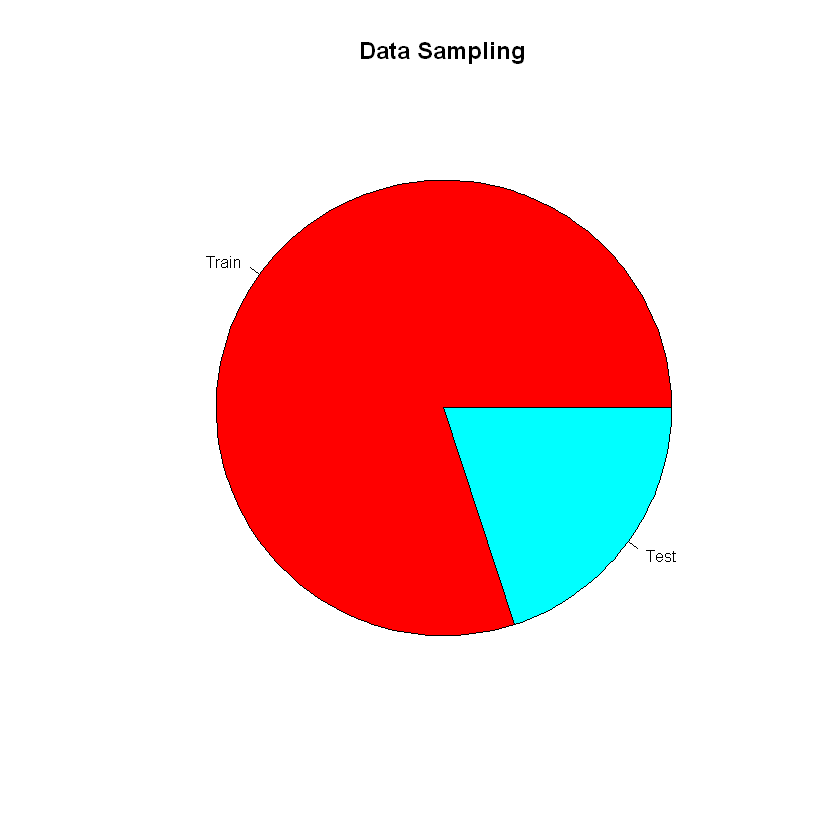

In [70]:
# Define cars vector with 5 values
train_test <- c(nrow(sample_wn$vra_wu_train), nrow(sample_wn$vra_wu_test))

#define colors
colors=rainbow(length(train_test))

# Calculate the percentage for each 
# decimal place
train_test_labels <- c("Train","Test")

# Create a pie chart with defined heading and custom colors
# and labels
pie(train_test, main="Data Sampling", col=colors, labels=train_test_labels,
   cex=0.8)


<h3>Normalization</h3>

<h4>Without Normalization</h4>
sample_wn

In [2]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/sample_wn.RData")
head(sample_wn$vra_wu_train["departure_temperature"],5)

departure_temperature
24
25
25
28
29


<h4>MinMax</h4>
sample_mm

In [31]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/sample_mm.RData")

In [38]:
head(sample_mm$vra_wu_train["departure_temperature"],5)

,departure_temperature
1,0.5853659
2,0.6097561
3,0.6097561
5,0.7073171
6,0.7317073


<h4>Z-score</h4>
sample_zs

In [39]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/sample_zs.RData")

In [40]:
head(sample_zs$vra_wu_train["departure_temperature"],5)

,departure_temperature
1,0.1043046
2,0.2818667
4,0.8145532
6,1.1696775
9,2.0574882


<h3>Balancing</h3>

<h4>Without Balancing</h4>

In [44]:
nrow(sample_wn$vra_wu_train)

[1] 1322353

<h4>With Balancing</h4>

<h5>Random Subsampling (RS)</h5>

In [3]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/subsampling_wn.RData")

In [48]:
nrow(subsampling_wn$vra_wu_train)

[1] 378836

<h5>Synthetic Minority Over-sampling Technique (SMOTE)</h5>

In [4]:
load("E:/leonardosm/Documents/Mestrado/Monografia/novo_servidor/Brazilian-Flight-Delay/demonstracao/presentation/dataset/smote_bl_sample_wn.RData")

In [6]:
nrow(smote_bl_sample_wn$vra_wu_train)

[1] 2266100

Counting Delayed or not Delayed Data for each balancing data

In [32]:
 sample_wn_delayed <- table(sample_wn$vra_wu_train$delayed)

 subsampling_wn_delayed<- table(subsampling_wn$vra_wu_train$delayed)

 smote_bl_sample_wn_delayed<- table(smote_bl_sample_wn$vra_wu_train$delayed)



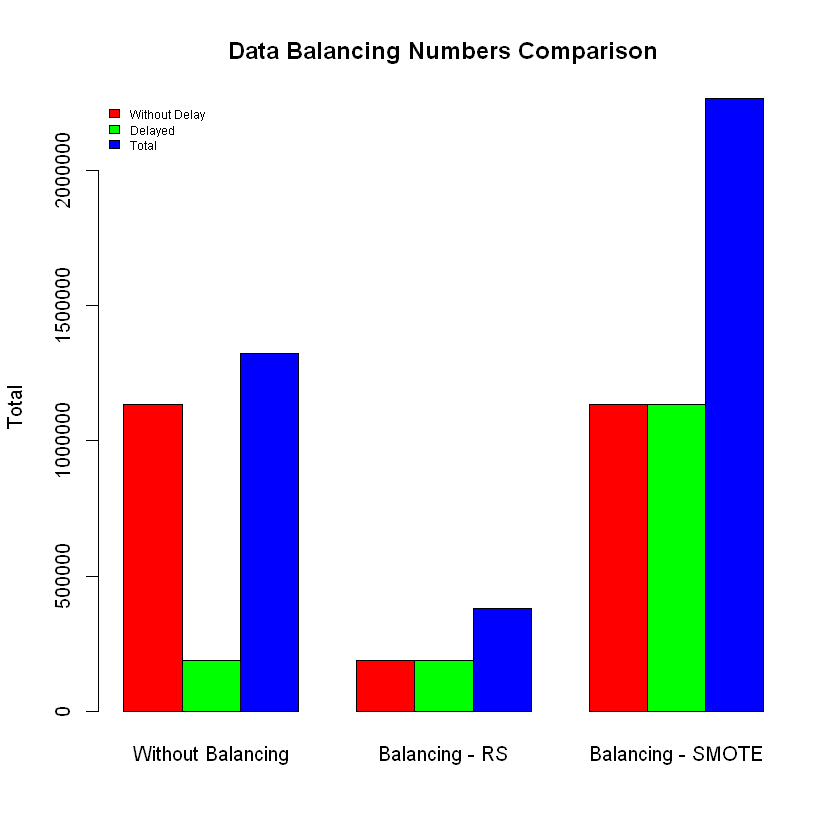

In [38]:

# Read values from tab-delimited autos.dat 
autos_data <- matrix( c( sample_wn_delayed[1], sample_wn_delayed[2], nrow(sample_wn$vra_wu_train),
                         subsampling_wn_delayed[1], subsampling_wn_delayed[2],nrow(subsampling_wn$vra_wu_train),
                         smote_bl_sample_wn_delayed[1], smote_bl_sample_wn_delayed[2],nrow(smote_bl_sample_wn$vra_wu_train)), nrow=3, ncol=3)
   
colnames(autos_data) <- c("Without Balancing","Balancing - RS","Balancing - SMOTE")

# Graph autos with adjacent bars using rainbow colors
barplot(as.matrix(autos_data), main="Data Balancing Numbers Comparison", ylab= "Total",
   beside=TRUE, col=rainbow(3))


text(x = as.matrix(autos_data), y = autos_data, label = autos_data, pos = 3, cex = 0.8, col = "red")
# Place the legend at the top-left corner with no frame  
# using rainbow colors
legend("topleft", c("Without Delay","Delayed","Total"), cex=0.6, 
   bty="n", fill=rainbow(3));

<h3> Feature Selection and Extraction</h3>

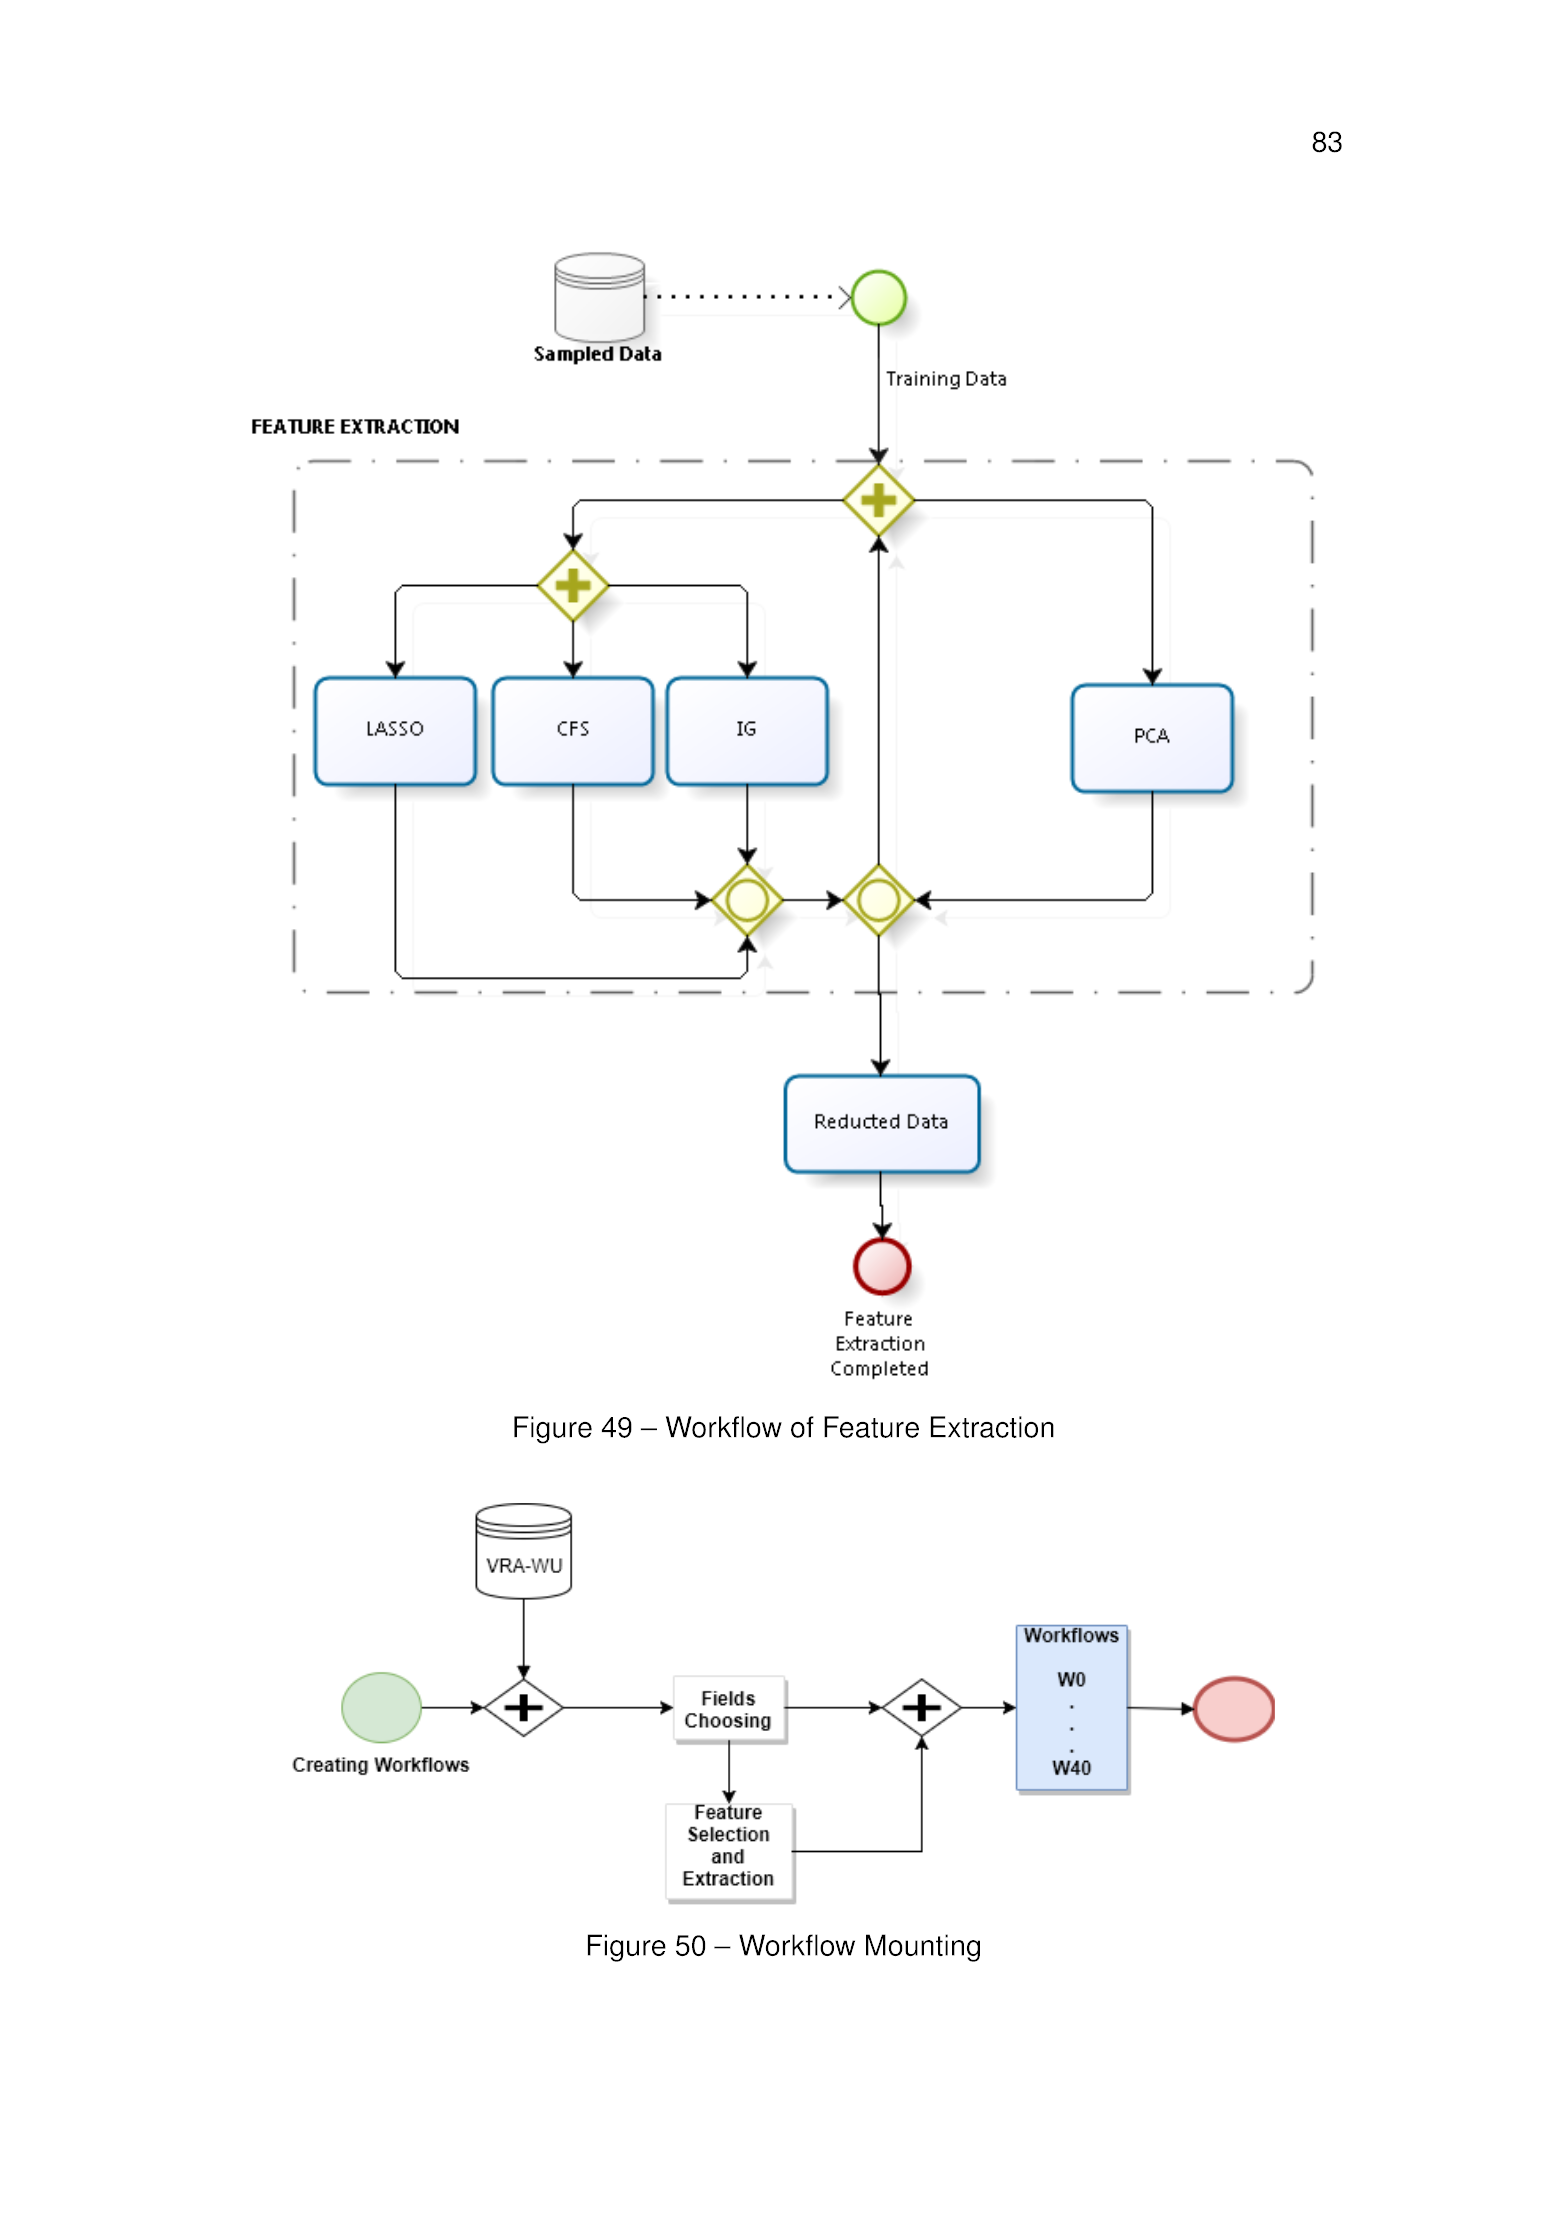

<h4>Workflow Detailing</h4>

 <style type="text/css">
.tg  {border-collapse:ollapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-fymr">Workflow</th>
    <th class="tg-fymr">Description</th>
    <th class="tg-fymr">ID(Dictionary)</th>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">Attributes[1,99]</td>
    <td class="tg-0pky">1,2,99,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">Attributes[1,2,12]</td>
    <td class="tg-0pky">1,2,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">Attributes[1,2,12,15]</td>
    <td class="tg-0pky">1,2,12,15,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">Attributes[1,12]</td>
    <td class="tg-0pky">1,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[8]</td>
    <td class="tg-0pky">1,2,12,8,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (PCA)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (PCA+LASSO)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (PCA+INFOGAIN)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (PCA+CFS)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (LASSO)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (INFOGAIN)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">Attributes[1,2,12] + Conditions[9] (CFS)</td>
    <td class="tg-0pky">1,2,12,9,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">Attributes[1,2,12] + Events[6]</td>
    <td class="tg-0pky">1,2,12,6,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">Attributes[1,2,12] + Events[7] (PCA+LASSO)</td>
    <td class="tg-0pky">1,2,12,7,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">Attributes[1,2,12]+ Events[7] (CFS)</td>
    <td class="tg-0pky">1,2,7,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-0pky">Attributes[1,2,12] + Events[7](LASSO)+<br> Conditions[9](CFS)</td>
    <td class="tg-0pky">1,2,7,9,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-0pky">Attributes[1,2,12] + Events[7](PCA+LASSO)+<br>Conditions[9] (PCA+CFS)</td>
    <td class="tg-0pky">1,2,7,9,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">17</td>
    <td class="tg-0pky">Attributes[1,6,8,99]</td>
    <td class="tg-0pky">1,6,8,99,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">18</td>
    <td class="tg-0pky">Attributes[2,12]</td>
    <td class="tg-0pky">2,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">19</td>
    <td class="tg-0pky">Attributes[2,12]+ Airlines[11](PCA+INFOGAIN)</td>
    <td class="tg-0pky">2,10,11,12</td>
  </tr>
  <tr>
    <td class="tg-0pky">20</td>
    <td class="tg-0pky">Attributes[2,12]+ Departure[13](PCA+INFOGAIN)</td>
    <td class="tg-0pky">2,12,10,13</td>
  </tr>
  <tr>
    <td class="tg-0pky">21</td>
    <td class="tg-0pky">Attributes[2,12]+  Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,12,10,14</td>
  </tr>
  <tr>
    <td class="tg-0pky">22</td>
    <td class="tg-0pky">Attributes[2,12]+  Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">23</td>
    <td class="tg-0pky">Attributes[2,12]+  Airlines[11](CFS)+Departure[13](CFS)+<br> Arrival[14](CFS)</td>
    <td class="tg-0pky">2,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">24</td>
    <td class="tg-0pky">Attributes[2,12]+  Events[7](PCA+CFS)+<br>Airlines[11](PCA+CFS)+Departure[13](PCA+CFS)+<br>Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,12,7,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">25</td>
    <td class="tg-0pky">Attributes[2,12]+  Conditions[9](CFS)+   Airlines[11](CFS)+<br> Departure[13](CFS)+Arrival[14](CFS)</td>
    <td class="tg-0pky">2,12,9,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">26</td>
    <td class="tg-0pky">Attributes[2,12]+Conditions[8]+Airlines[11](PCA+CFS)+<br>Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,8,11,13,14,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">27</td>
    <td class="tg-0pky">Attributes[2,12]+  Events[7](CFS)+ Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,12,7,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">28</td>
    <td class="tg-0pky">Attributes[2,12]+  Conditions[9](CFS)+<br> Airlines[11](PCA+CFS)+Departure[13](PCA+CFS)+<br>Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,12,9,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">29</td>
    <td class="tg-0pky">Attributes[2,12]+  [Events[7]+ Airlines[11]+Departure[13]+<br>Arrival[14]](PCA+CFS)</td>
    <td class="tg-0pky">2,12,7,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">30</td>
    <td class="tg-0pky">Attributes[1,3,12]</td>
    <td class="tg-0pky">1,3,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">31</td>
    <td class="tg-0pky">Attributes[3,12]+ Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">3,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">32</td>
    <td class="tg-0pky">Attributes[1,4,12]</td>
    <td class="tg-0pky">1,4,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">33</td>
    <td class="tg-0pky">Attributes[4,12]+ Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">4,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">34</td>
    <td class="tg-0pky">Attributes[1,5,12]</td>
    <td class="tg-0pky">1,5,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">35</td>
    <td class="tg-0pky">Attributes[5,12]+ Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)\</td>
    <td class="tg-0pky">5,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">36</td>
    <td class="tg-0pky">Attributes[1,2,4,12]</td>
    <td class="tg-0pky">1,2,4,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">37</td>
    <td class="tg-0pky">Attributes[2,4,12]+ Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,4,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">38</td>
    <td class="tg-0pky">Attributes[1,3,5,12]</td>
    <td class="tg-0pky">1,3,5,12,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">39</td>
    <td class="tg-0pky">Attributes[3,5,12]+Airlines[11](PCA+CFS)+<br> Departure[13](PCA+CFS)+ Arrival[14](PCA+CFS)</td>
    <td class="tg-0pky">2,4,12,11,13,14,10</td>
  </tr>
  <tr>
    <td class="tg-0pky">40</td>
    <td class="tg-0pky">Attributes[1,4,99]</td>
    <td class="tg-0pky">1,4,6,99,10</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-fymr"></th>
    <th class="tg-fymr"></th>
    <th class="tg-7btt" colspan="4">Reduction Strategies</th>
  </tr>
  <tr>
    <td class="tg-7btt"></td>
    <td class="tg-7btt" colspan="2">ML</td>
    <td class="tg-7btt" colspan="3">Feature Selection</td>
    <td class="tg-7btt">Feature Extraction</td>
  </tr>
  <tr>
    <td class="tg-7btt">Workflow</td>
    <td class="tg-7btt">RF</td>
    <td class="tg-7btt">NN</td>
    <td class="tg-7btt">LASSO(LS)</td>
    <td class="tg-7btt">INFOGAIN(IG)</td>
    <td class="tg-7btt">CFS</td>
    <td class="tg-7btt">PCA</td>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">17</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">18</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">19</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">20</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">21</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">22</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">23</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">24</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">25</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">26</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">27</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">28</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">29</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">30</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">31</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">32</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">33</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">34</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">35</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">36</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">37</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">38</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
  <tr>
    <td class="tg-0pky">39</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">40</td>
    <td class="tg-c3ow">X</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
  </tr>
</table>

<h4>Realized Experiments</h4>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-fymr">Code</th>
    <th class="tg-7btt">Experiment Description</th>
    <th class="tg-7btt">Workflow</th>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-c3ow">Comparison Between Original and Transformed Time</td>
    <td class="tg-0pky">0,1,22</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-c3ow">Comparison of Conceptual Hierarchy (Departure Time<br> Original)</td>
    <td class="tg-0pky">0,1,2,3</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-c3ow">Comparison of Feature Selection Techniques(CFS,<br> PCA,LASSO,IG) on Conditions</td>
    <td class="tg-0pky">4;5:11;25,28</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-c3ow">Comparison of Feature Selection Techniques(LASSO,<br> CFS,PCA) on Events</td>
    <td class="tg-0pky">13,14;24,27,29</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-c3ow">Comparison of Feature Selection Techniques(LASSO,<br> CFS,PCA) on Events and Conditions</td>
    <td class="tg-0pky">15,16,17</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-c3ow">Comparison of data with and without Airline,<br> Departure and Arrival fields</td>
    <td class="tg-0pky">1,18</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-c3ow">Comparison of impacts of separately e together data of Airline, <br>Departure and Arrival</td>
    <td class="tg-0pky">19,20,21,22</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-c3ow">Comparison of Feature Selection to completely data<br> (Airline,Arrival,Departure)</td>
    <td class="tg-0pky">22,23</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-c3ow">Comparison of Best {Basics+Events} and  CM<br> (Airline,Arrival,Departure)+ Events{7}</td>
    <td class="tg-0pky">12,14,27</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-c3ow">Comparison Between CM(Airline,Arrival,<br> Departure) + Conditions{8,9}</td>
    <td class="tg-0pky">4,9,26,28</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-c3ow">Comparison between Original {2} and Discretized{3},<br>  With and Without CM(Airline,Departure,Arrival)</td>
    <td class="tg-0pky">1,30,31</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-c3ow">Comparison between Original {4} and Discretized{5},<br>  With and Without CM(Airline,Departure,Arrival)</td>
    <td class="tg-0pky">1,32,33,34,35</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-c3ow">Comparsion between include Discretized{4}  on <br> Basic With and Without CM(Airline, Departure,Arrival)</td>
    <td class="tg-0pky">1,36,37,40</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-c3ow">Comparsion between include Discretized{3,5} and Basic</td>
    <td class="tg-0pky"> 1,38,39 </td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-c3ow">Comparison of Normalization Methods </td>
    <td class="tg-0pky">All</td>
  </tr>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-c3ow">Comparison of Balancing Methods</td>
    <td class="tg-0pky">All</td>
  </tr>
  <tr>
    <td class="tg-0pky">17</td>
    <td class="tg-c3ow">Comparison of Threshold Approach</td>
    <td class="tg-0pky">All</td>
  </tr>
  <tr>
    <td class="tg-0pky">18</td>
    <td class="tg-c3ow">Random Forest X Neural Networks</td>
    <td class="tg-0pky">All</td>
  </tr>
  <tr>
    <td class="tg-0pky">19</td>
    <td class="tg-c3ow">Accuracy, Sensibility and F1-Score</td>
    <td class="tg-0pky">All</td>
  </tr>
  <tr>
    <td class="tg-0pky">20</td>
    <td class="tg-c3ow">Time Elapsed</td>
    <td class="tg-0pky">All</td>
  </tr>
</table>

<h3>Results</h3>

<h4>Better F1-Score</h4>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-u0o7{font-weight:bold;text-decoration:underline;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-dvpl{border-color:inherit;text-align:right;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt">Threshold</th>
    <th class="tg-7btt">WF</th>
    <th class="tg-7btt">ML</th>
    <th class="tg-7btt">BL</th>
    <th class="tg-7btt">NM</th>
    <th class="tg-7btt">AC</th>
    <th class="tg-7btt">SS/R</th>
    <th class="tg-7btt">SP</th>
    <th class="tg-7btt">P</th>
    <th class="tg-7btt">F1-Score</th>
    <th class="tg-7btt">Time</th>
  </tr>
  <tr>
    <td class="tg-fymr" rowspan="5">Conventional</td>
    <td class="tg-0pky">2</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">ZS</td>
    <td class="tg-0pky">0,947</td>
    <td class="tg-dvpl">0,700</td>
    <td class="tg-dvpl">0,989</td>
    <td class="tg-dvpl">0,912</td>
    <td class="tg-u0o7">0,792</td>
    <td class="tg-dvpl">7,638</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">MM</td>
    <td class="tg-0pky">0,947</td>
    <td class="tg-dvpl">0,695</td>
    <td class="tg-dvpl">0,989</td>
    <td class="tg-dvpl">0,911</td>
    <td class="tg-fymr">0,789</td>
    <td class="tg-dvpl">7,855</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">WN</td>
    <td class="tg-0pky">0,946</td>
    <td class="tg-dvpl">0,691</td>
    <td class="tg-dvpl">0,989</td>
    <td class="tg-dvpl">0,911</td>
    <td class="tg-fymr">0,786</td>
    <td class="tg-dvpl">7,317</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">MM</td>
    <td class="tg-0pky">0,943</td>
    <td class="tg-dvpl">0,674</td>
    <td class="tg-dvpl">0,988</td>
    <td class="tg-dvpl">0,902</td>
    <td class="tg-fymr">0,772</td>
    <td class="tg-dvpl">8,252</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">ZS</td>
    <td class="tg-0pky">0,942</td>
    <td class="tg-dvpl">0,674</td>
    <td class="tg-dvpl">0,987</td>
    <td class="tg-dvpl">0,897</td>
    <td class="tg-fymr">0,770</td>
    <td class="tg-dvpl">7,981</td>
  </tr>
  <tr>
    <td class="tg-fymr" rowspan="5">Majority</td>
    <td class="tg-0pky">22</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">WN</td>
    <td class="tg-0pky">0,940</td>
    <td class="tg-dvpl">0,875</td>
    <td class="tg-dvpl">0,950</td>
    <td class="tg-dvpl">0,746</td>
    <td class="tg-u0o7">0,806</td>
    <td class="tg-dvpl">10,296</td>
  </tr>
  <tr>
    <td class="tg-0pky">27</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">WN</td>
    <td class="tg-0pky">0,940</td>
    <td class="tg-dvpl">0,875</td>
    <td class="tg-dvpl">0,950</td>
    <td class="tg-dvpl">0,746</td>
    <td class="tg-u0o7">0,806</td>
    <td class="tg-dvpl">10,415</td>
  </tr>
  <tr>
    <td class="tg-0pky">28</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">WN</td>
    <td class="tg-0pky">0,940</td>
    <td class="tg-dvpl">0,875</td>
    <td class="tg-dvpl">0,950</td>
    <td class="tg-dvpl">0,746</td>
    <td class="tg-u0o7">0,806</td>
    <td class="tg-dvpl">10,508</td>
  </tr>
  <tr>
    <td class="tg-0pky">24</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">WN</td>
    <td class="tg-0pky">0,939</td>
    <td class="tg-dvpl">0,881</td>
    <td class="tg-dvpl">0,949</td>
    <td class="tg-dvpl">0,740</td>
    <td class="tg-fymr">0,805</td>
    <td class="tg-dvpl">10,732</td>
  </tr>
  <tr>
    <td class="tg-0pky">22</td>
    <td class="tg-dvpl">RF</td>
    <td class="tg-0pky">IMB</td>
    <td class="tg-0pky">ZS</td>
    <td class="tg-0pky">0,938</td>
    <td class="tg-dvpl">0,896</td>
    <td class="tg-dvpl">0,945</td>
    <td class="tg-dvpl">0,729</td>
    <td class="tg-fymr">0,804</td>
    <td class="tg-dvpl">9,777</td>
  </tr>
</table>